# 공원 산책

## 문제 설명

* 지나다니는 길을 'O', 장애물을 'X'로 나타낸 직사각형 격자 모양의 공원에서 로봇 강아지가 산책을 하려합니다. 산책은 로봇 강아지에 미리 입력된 명령에 따라 진행하며, 명령은 다음과 같은 형식으로 주어집니다.

    * ["방향 거리", "방향 거리" … ]

* 예를 들어 "E 5"는 로봇 강아지가 현재 위치에서 동쪽으로 5칸 이동했다는 의미입니다. 로봇 강아지는 명령을 수행하기 전에 다음 두 가지를 먼저 확인합니다.

    * 주어진 방향으로 이동할 때 공원을 벗어나는지 확인합니다.
    * 주어진 방향으로 이동 중 장애물을 만나는지 확인합니다.

* 위 두 가지중 어느 하나라도 해당된다면, 로봇 강아지는 해당 명령을 무시하고 다음 명령을 수행합니다.
공원의 가로 길이가 W, 세로 길이가 H라고 할 때, 공원의 좌측 상단의 좌표는 (0, 0), 우측 하단의 좌표는 (H - 1, W - 1) 입니다.

In [1]:
from IPython.display import Image

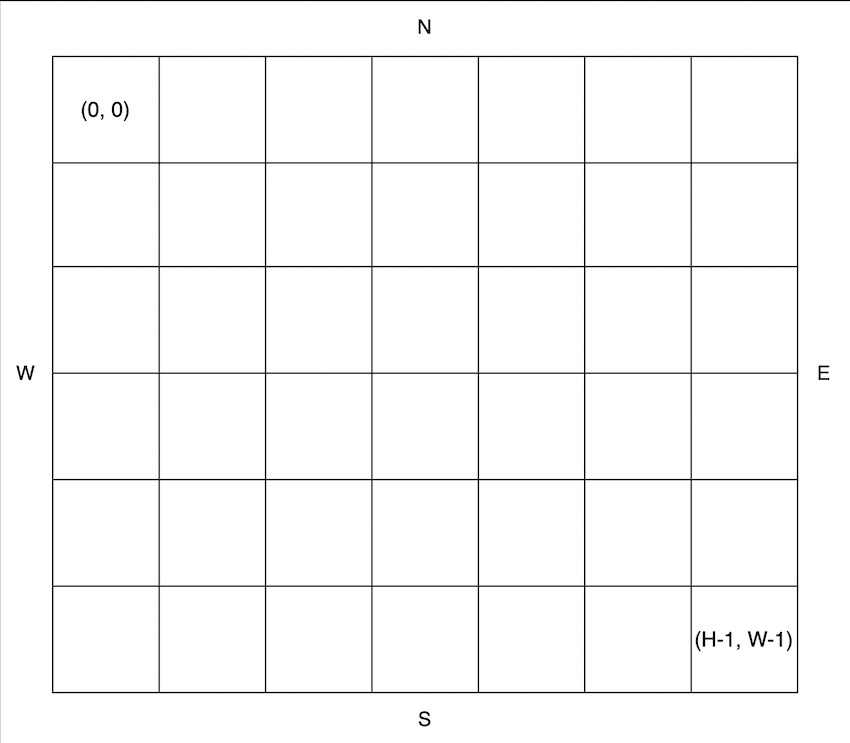

In [2]:
Image('./image/프로그래머스_공원_산책.png')

* 공원을 나타내는 문자열 배열 park, 로봇 강아지가 수행할 명령이 담긴 문자열 배열 routes가 매개변수로 주어질 때, 로봇 강아지가 모든 명령을 수행 후 놓인 위치를 [세로 방향 좌표, 가로 방향 좌표] 순으로 배열에 담아 return 하도록 solution 함수를 완성해주세요.

## 제한사항

* 3 ≤ park의 길이 ≤ 50
    * 3 ≤ park[i]의 길이 ≤ 50
        * park[i]는 다음 문자들로 이루어져 있으며 시작지점은 하나만 주어집니다.
            * S : 시작 지점
            * O : 이동 가능한 통로
            * X : 장애물
        * park는 직사각형 모양입니다.
* 1 ≤ routes의 길이 ≤ 50
    * routes의 각 원소는 로봇 강아지가 수행할 명령어를 나타냅니다.
    * 로봇 강아지는 routes의 첫 번째 원소부터 순서대로 명령을 수행합니다.
    * routes의 원소는 "op n"과 같은 구조로 이루어져 있으며, op는 이동할 방향, n은 이동할 칸의 수를 의미합니다.
        * op는 다음 네 가지중 하나로 이루어져 있습니다.
            * N : 북쪽으로 주어진 칸만큼 이동합니다.
            * S : 남쪽으로 주어진 칸만큼 이동합니다.
            * W : 서쪽으로 주어진 칸만큼 이동합니다.
            * E : 동쪽으로 주어진 칸만큼 이동합니다.
        * 1 ≤ n ≤ 9

## 입출력 예

|park|routes|result|
|---|---|---|
|["SOO","OOO","OOO"]|["E 2","S 2","W 1"]|[2,1]|
|["SOO","OXX","OOO"]|["E 2","S 2","W 1"]|[0,1]|
|["OSO","OOO","OXO","OOO"]|["E 2","S 3","W 1"]|[0,0]|

## Code

In [3]:
# 프로그래머스_공원 산책
def get_start_point(park):
    for i, row in enumerate(park):
        for j, way in enumerate(row):
            if way == 'S':
                return i, j

def in_range(y, x, park):
    y_length, x_length = len(park), len(park[0])
    return (0 <= y < y_length) & (0 <= x < x_length)

def move_foward(direction, distance, park, position):
    y, x = position
    if direction == 'N':
        for i in range(1, distance+1):
            ny = y - i
            if in_range(ny, x, park):
                if park[ny][x] == 'X':
                    break
            else:
                break
        else:
            y = y - distance

    elif direction == 'S':
        for i in range(1, distance+1):
            ny = y + i
            if in_range(ny, x, park):
                if park[ny][x] == 'X':
                    break
            else:
                break
        else:
            y = y + distance

    elif direction == 'W':
        for i in range(1, distance+1):
            nx = x - i
            if in_range(y, nx, park):
                if park[y][nx] == 'X':
                    break
            else:
                break
        else:
            x = x - distance
    elif direction == 'E':
        for i in range(1, distance+1):
            nx = x + i
            if in_range(y, nx, park):
                if park[y][nx] == 'X':
                    break
            else:
                break
        else:
            x = x + distance
    return y, x

def solution(park, routes):
    y, x = get_start_point(park)
    for route in routes:
        direction, distance = route.split()
        distance = int(distance)
        y, x = move_foward(direction, distance, park, (y, x))
    answer = [y, x]
    return answer

In [ ]:
# 프로그래머스_공원 산책(for ~ else 구현 풀이)
def get_start_point(park):
    for i, row in enumerate(park):
        for j, way in enumerate(row):
            if way == 'S':
                return i, j

def in_range(y, x, park):
    y_length, x_length = len(park), len(park[0])
    return (0 <= y < y_length) & (0 <= x < x_length)

def move_foward(direction, distance, park, position):
    y, x = position
    status = True
    if direction == 'N':
        for i in range(1, distance+1):
            ny = y - i
            if in_range(ny, x, park):
                if park[ny][x] == 'X':
                    status = False
                    break
            else:
                status = False
                break
                
        if status:
            y = y - distance

    elif direction == 'S':
        for i in range(1, distance+1):
            ny = y + i
            if in_range(ny, x, park):
                if park[ny][x] == 'X':
                    status = False
                    break
            else:
                status = False
                break
                
        if status:
            y = y + distance

    elif direction == 'W':
        for i in range(1, distance+1):
            nx = x - i
            if in_range(y, nx, park):
                if park[y][nx] == 'X':
                    status = False
                    break
            else:
                status = False
                break
                
        if status:
            x = x - distance
            
    elif direction == 'E':
        for i in range(1, distance+1):
            nx = x + i
            if in_range(y, nx, park):
                if park[y][nx] == 'X':
                    status = False
                    break
            else:
                status = False
                break
                
        if status:
            x = x + distance
            
    return y, x

def solution(park, routes):
    y, x = get_start_point(park)
    for route in routes:
        direction, distance = route.split()
        distance = int(distance)
        y, x = move_foward(direction, distance, park, (y, x))
    answer = [y, x]
    return answer

In [4]:
solution(["SOO","OOO","OOO"], ["E 2","S 2","W 1"])

[2, 1]

In [5]:
solution(["SOO","OXX","OOO"], ["E 2","S 2","W 1"]	)

[0, 1]

In [6]:
solution(["OSO","OOO","OXO","OOO"], ["E 2","S 3","W 1"])

[0, 0]

## Note

* 1. 시작점에서 주어진 방향 및 거리로 이동이 불가능하다면 해당 명령을 무시하고 이동이 가능하면 해당 좌표로 이동한다.
    * 1\) in_range 함수를 통해서 이동 거리만큼 떨어진 좌표가 전체 범위를 벗어나는지 확인한다.
    * 2\) for문을 이용해서 해당 좌표료 한칸씩 이동하면서 장애물이 있는지 탐색한다.
    * 3\) 두가지 조건을 모두 만족하면 기존 좌표 값을 저장한 변수를 새로운 좌표 값으로 최신화 하고, 만족하지 않으면 기존 좌표 값을 사용한다.

* 1. 시작점에서 주어진 방향 및 거리로 이동이 불가능하다면 해당 명령을 무시하고 이동이 가능하면 해당 좌표로 이동한다.
    * 1\) in_range 함수를 통해서 이동 거리만큼 떨어진 좌표가 전체 범위를 벗어나는지 확인한다.
    * 2\) for문을 이용해서 해당 좌표료 한칸씩 이동하면서 장애물이 있는지 탐색한다.
    * 3\) 두가지 조건을 모두 만족하면 기존 좌표 값을 저장한 변수를 새로운 좌표 값으로 최신화 하고, 만족하지 않으면 기존 좌표 값을 사용한다.
* 2. 파이썬 문법인 for ~ else 대신 직접 구현한 코드

https://school.programmers.co.kr/learn/courses/30/lessons/172928